<a href="https://colab.research.google.com/github/marekpiotradamczyk/ml_uwr_23/blob/main/Assignments/Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Assignment 8

**Submission deadline:**
* **lab session in the week 29.1-2.2.24**

**Points: 3 points**


In [3]:
!pip install plotly


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


# Learning a sphere

Below you can find a sphere given by a function $f(\phi, \theta) = (x,y,z) = (\sin \theta \cdot \cos \phi, \sin \theta \cdot \sin \phi, \cos \theta)$. Let's add some more jazz to it, and let add a random normal noise to each point so that the relation between $X$ and $Y$ will be given by $Y = f(\phi, \theta) + \varepsilon$, where $\varepsilon \sim \mathcal{N}\left(0^3, \sigma\cdot \begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{pmatrix}\right)$ is a 3-dimensional Normal Distribution.

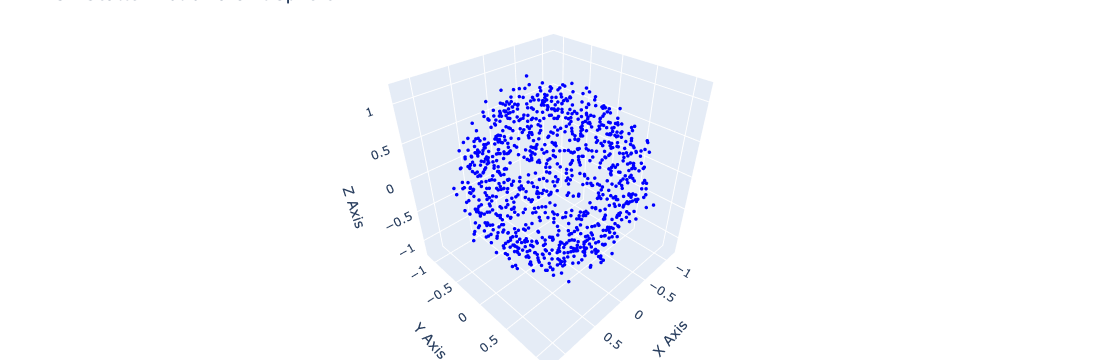

In [10]:
import plotly.graph_objects as go
import numpy as np

# Number of points
n_points = 1000

# Generate random points on a sphere
phi = np.random.uniform(0, 2 * np.pi, n_points)
theta = np.arccos(np.random.uniform(-1, 1, n_points))

# Convert spherical coordinates to Cartesian coordinates
x = np.sin(theta) * np.cos(phi) 
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

#Let's add noise
epsilon = 0.1
x = x + np.random.randn(n_points) * epsilon
y = y + np.random.randn(n_points) * epsilon
z = z + np.random.randn(n_points) * epsilon

# Create a Plotly figure
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers',
                                   marker=dict(size=2, color='blue'))])

# Update layout for a better view
fig.update_layout(title="3D Scatter Plot on a Unit Sphere",
                  scene=dict(
                      xaxis_title='X Axis',
                      yaxis_title='Y Axis',
                      zaxis_title='Z Axis'
                  ),
                  margin=dict(l=0, r=0, b=0, t=0))

# Show the plot
fig.show()


## Task [3p]
Write a simple neural network which will learn function $f(\phi, \theta) =  (\sin \theta \cdot \cos \phi, \sin \theta \cdot \sin \phi, \cos \theta) = (x,y,z)$. Use the `phi,theta` and `x,y,z` dataset from the previous cells. Visualize your learnt sphere. Your output should look roughly like below:

Epoch 0, Loss: 0.013875555247068405
Epoch 1000, Loss: 0.011508245021104813
Epoch 2000, Loss: 0.010985623113811016
Epoch 3000, Loss: 0.011665425263345242
Epoch 4000, Loss: 0.011697675101459026
Epoch 5000, Loss: 0.011918517760932446
Epoch 6000, Loss: 0.011166151612997055
Epoch 7000, Loss: 0.01519583910703659
Epoch 8000, Loss: 0.011156243272125721
Epoch 9000, Loss: 0.010563728399574757


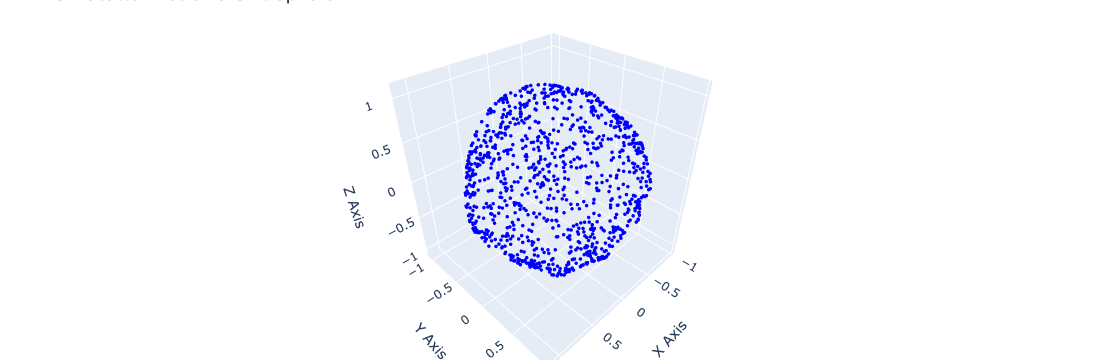

In [22]:
import plotly.graph_objects as go
import numpy as np

# After training, use the learned model to predict the transformed points
predicted_points = neural_network(params, phi_theta)

# Create a Plotly figure
fig = go.Figure(data=[go.Scatter3d(x=predicted_points[:,0],
                                   y=predicted_points[:,1],
                                   z=predicted_points[:,2],
                                   mode='markers',
                                   marker=dict(size=2, color='blue'))])

# Update layout for a better view
fig.update_layout(title="3D Scatter Plot on a Unit Sphere",
                  scene=dict(
                      xaxis_title='X Axis',
                      yaxis_title='Y Axis',
                      zaxis_title='Z Axis'
                  ),
                  margin=dict(l=0, r=0, b=0, t=0))

# Show the plot
fig.show()
